<a href="https://colab.research.google.com/github/cawllol/Deep-learning/blob/master/Google_Stock_price_prediction_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [47]:
dataset_train=pd.read_csv('/content/Google_Stock_Price_Train.csv')
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [ ]:
training_set=dataset_train.iloc[:,1:2].values

In [15]:
#Feature scaling
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1)) #normalization
training_set_scaled=sc.fit_transform(training_set)

In [16]:
#creating a data structure with 60 timesteps and 1 output
X_train=[]
y_train=[]
for i in range(60,1258):
  X_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])
X_train,y_train=np.array(X_train),np.array(y_train)

In [17]:
#reshapping
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [18]:
#Building RNN
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [22]:
#initialising RNN
regressor=Sequential()

In [24]:
#adding LSTM layers & dropout regularization
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [25]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

In [26]:
#adding output layer
regressor.add(Dense(units=1))

In [27]:
#compiling
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [28]:
#fitting RNN to the training set
regressor.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
1198/1198 [==============================] - 16s 13ms/step - loss: 0.0501
Epoch 2/100
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0059
Epoch 3/100
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0053
Epoch 4/100
1198/1198 [==============================] - 13s 10ms/step - loss: 0.0053
Epoch 5/100
1198/1198 [==============================] - 13s 10ms/step - loss: 0.0055
Epoch 6/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0047
Epoch 7/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0050
Epoch 8/100
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0045
Epoch 9/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0041
Epoch 10/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0042
Epoch 11/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0045
Epoch 12/100
1198/1198 [============================

In [29]:
#Getting the real stock price of 2017
dataset_test = pd.read_csv('/content/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [30]:
#Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

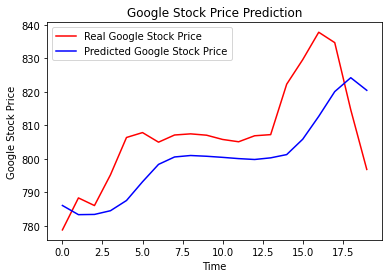

In [36]:
#Visualising the results
import matplotlib.pyplot as plt 
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()